In [ ]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
import os
import time


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_image
plt.style.use('seaborn')

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as keras_image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

from tensorflow.keras.callbacks import TensorBoard
%load_ext tensorboard

<ipython-input-2-ca7090765aa5>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Sekarang, Anda dapat mengakses Drive di folder /content/drive/MyDrive/


Mounted at /content/drive


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/Kaggle/archive_3.zip' # Sesuaikan path dengan lokasi file zip Anda di Google Drive
extract_path = '/content/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import zipfile

zip_path_normal_skin = '/content/drive/MyDrive/Kaggle/normal skin.zip' # Sesuaikan path dengan lokasi file zip normal skin di Google Drive
extract_path_normal_skin = '/content/'

with zipfile.ZipFile(zip_path_normal_skin, 'r') as zip_ref_normal_skin:
    zip_ref_normal_skin.extractall(extract_path_normal_skin)


In [ ]:
import os

# Path ke folder yang berisi gambar-gambar
image_folder = '/content/melanoma_cancer_dataset'

# Daftar nama folder
folder_names = [folder for folder in os.listdir(image_folder) if os.path.isdir(os.path.join(image_folder, folder))]

# Tampilkan daftar nama folder
print("Nama-nama folder:")
for folder_name in folder_names:
    print(folder_name)

    # Path ke subfolder di dalam setiap folder
    subfolder_path = os.path.join(image_folder, folder_name)

    # Daftar nama subfolder di dalam setiap folder
    subfolder_names = [subfolder for subfolder in os.listdir(subfolder_path) if os.path.isdir(os.path.join(subfolder_path, subfolder))]

    # Tampilkan daftar nama subfolder di dalam setiap folder
    print("Subfolder di dalam folder", folder_name)
    for subfolder_name in subfolder_names:
        print(subfolder_name)


Nama-nama folder:
train
Subfolder di dalam folder train
malignant
benign
test
Subfolder di dalam folder test
malignant
benign


Folder: malignant


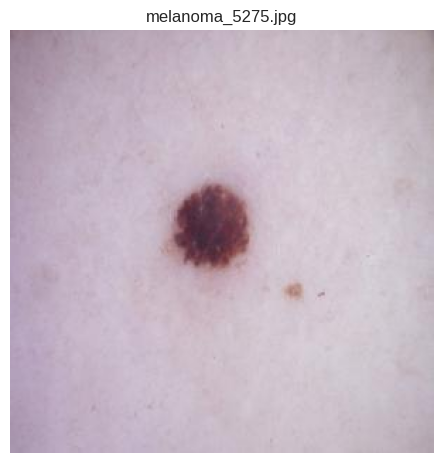

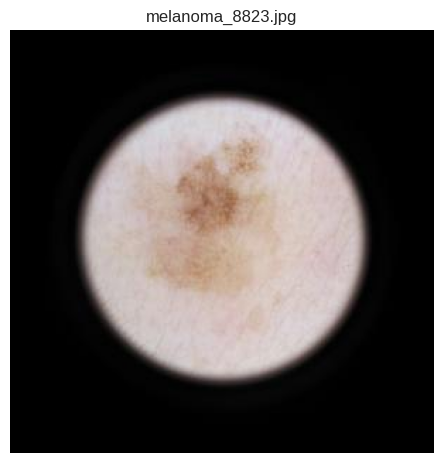

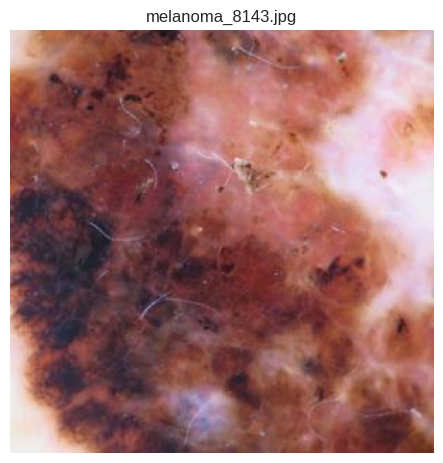

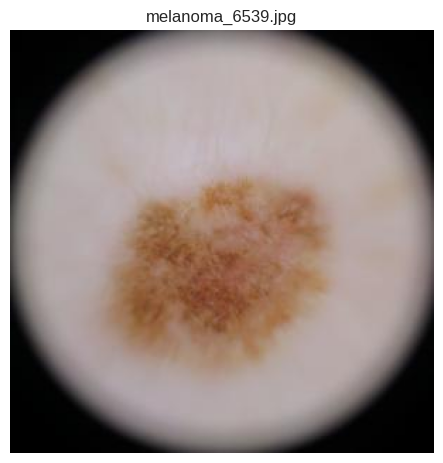

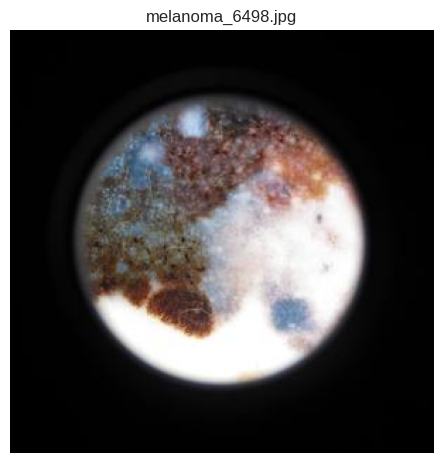

Folder: benign


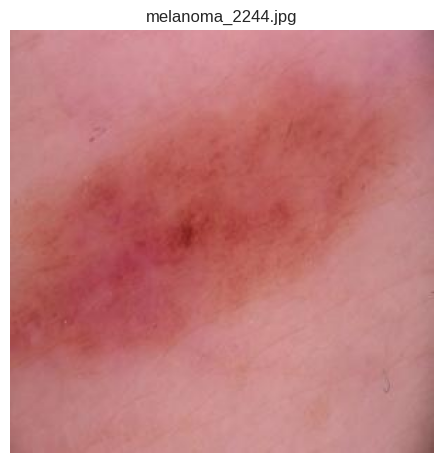

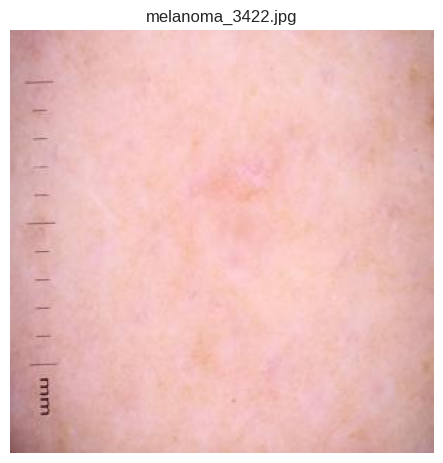

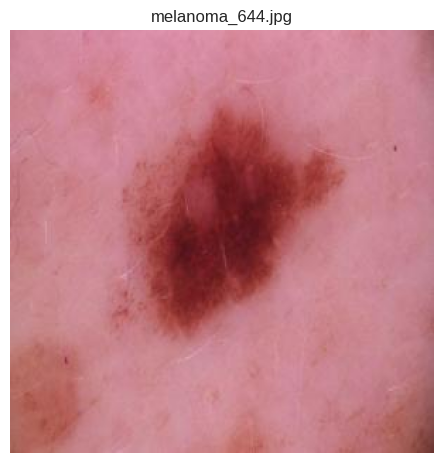

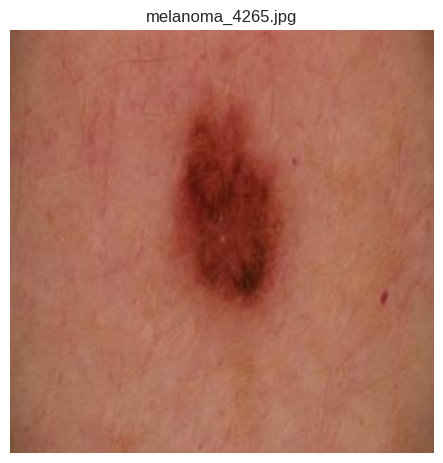

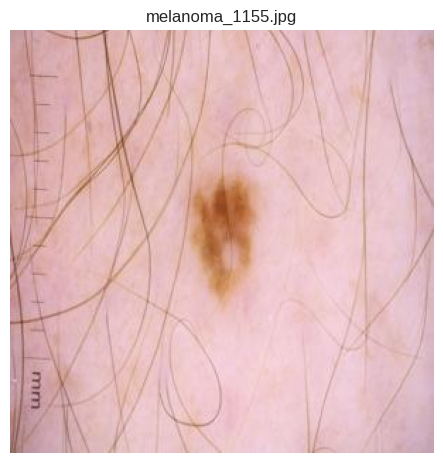

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path ke folder yang berisi gambar-gambar
image_folder = '/content/melanoma_cancer_dataset/train'

# Daftar nama folder
folder_names = [folder for folder in os.listdir(image_folder) if os.path.isdir(os.path.join(image_folder, folder))]

# Tampilkan 5 gambar dari setiap folder
for folder_name in folder_names:
    print(f"Folder: {folder_name}")
    folder_path = os.path.join(image_folder, folder_name)
    image_files = [file for file in os.listdir(folder_path) if file.endswith(('jpg', 'jpeg', 'png', 'gif'))]

    # Hanya menampilkan maksimal 5 gambar
    for i in range(min(5, len(image_files))):
        img_path = os.path.join(folder_path, image_files[i])
        img = Image.open(img_path)

        plt.imshow(img)
        plt.axis('off')
        plt.title(image_files[i])
        plt.show()


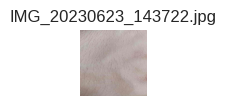

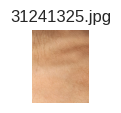

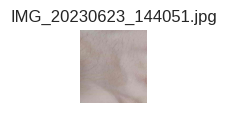

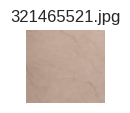

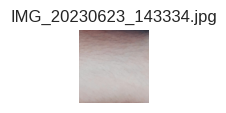

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path ke folder yang berisi gambar-gambar
image_folder_skin = "/content/normal skin"

# Mendapatkan daftar nama file gambar di folder
image_files_skin = os.listdir(image_folder_skin)

# Menampilkan 5 gambar dalam grid 1x1
num_images = min(5, len(image_files_skin))

# Menampilkan gambar-gambar
plt.figure(figsize=(5, 5))
for i in range(num_images):
    # Path lengkap untuk tiap gambar
    image_file_skin = image_files_skin[i]
    image_path_skin = os.path.join(image_folder_skin, image_file_skin)
    # Membaca gambar
    img_skin = mpimg.imread(image_path_skin)
    # Menampilkan gambar
    plt.subplot(5, 1, i+1)  # Menampilkan gambar dalam grid 1x1
    plt.imshow(img_skin)
    plt.axis('off')
    plt.title(image_file_skin)
    plt.show()
    print()

Folder: malignant


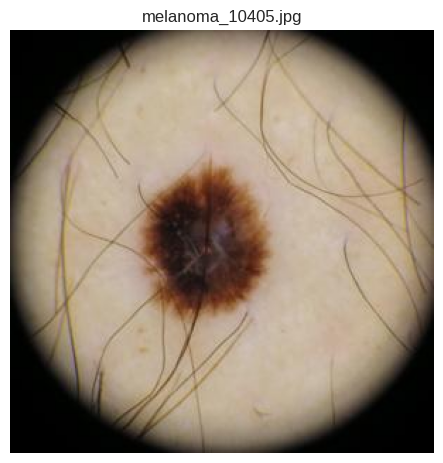

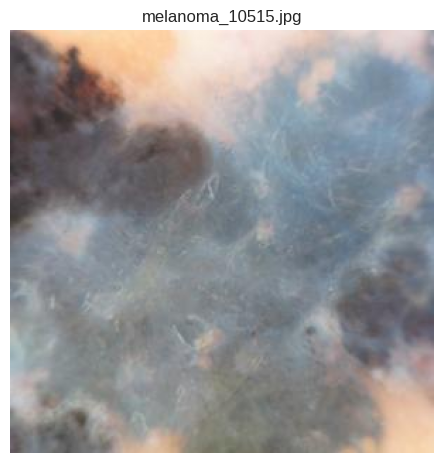

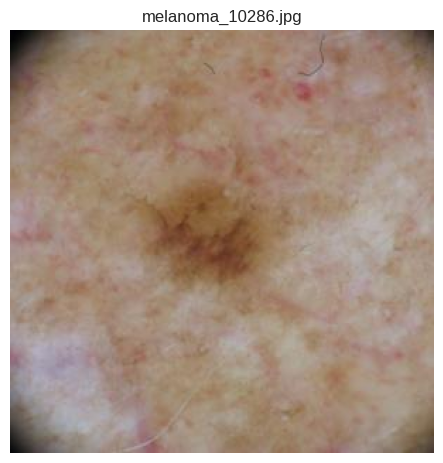

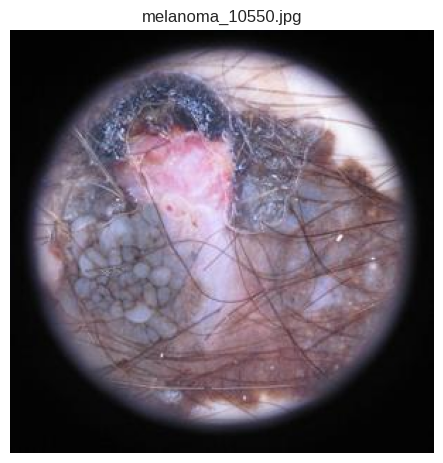

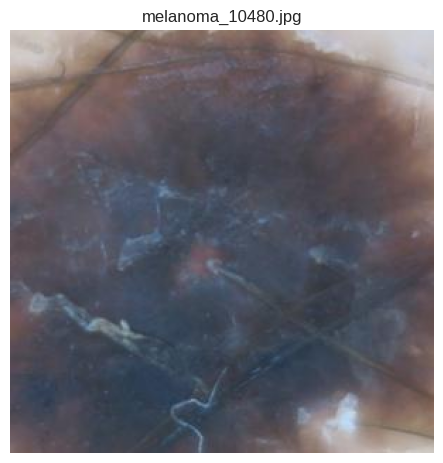

Folder: benign


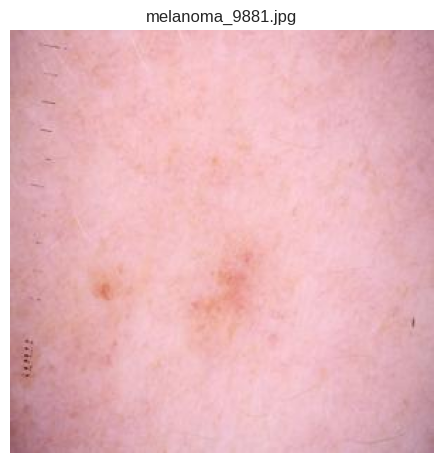

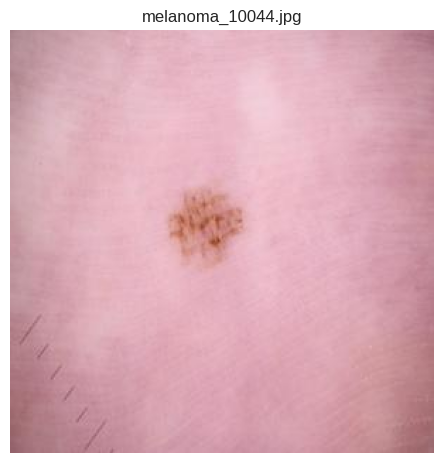

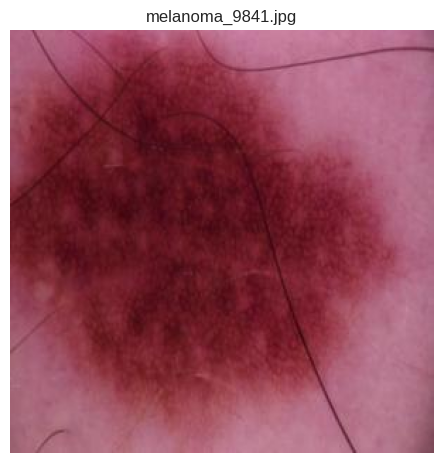

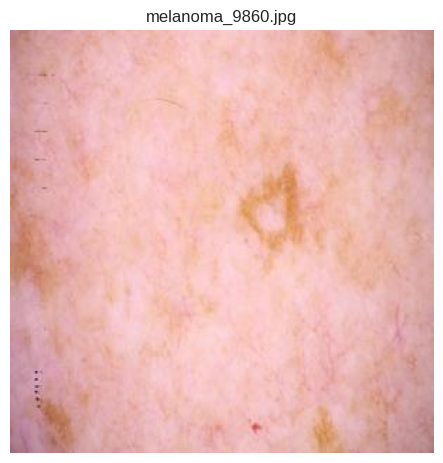

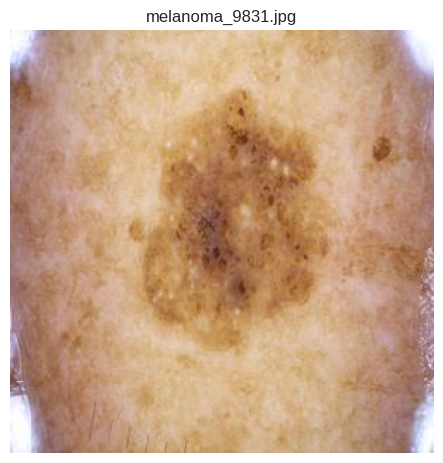

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path ke folder yang berisi gambar-gambar
image_folder = '/content/melanoma_cancer_dataset/test'

# Daftar nama folder
folder_names = [folder for folder in os.listdir(image_folder) if os.path.isdir(os.path.join(image_folder, folder))]

# Tampilkan 5 gambar dari setiap folder
for folder_name in folder_names:
    print(f"Folder: {folder_name}")
    folder_path = os.path.join(image_folder, folder_name)
    image_files = [file for file in os.listdir(folder_path) if file.endswith(('jpg', 'jpeg', 'png', 'gif'))]

    # Hanya menampilkan maksimal 5 gambar
    for i in range(min(5, len(image_files))):
        img_path = os.path.join(folder_path, image_files[i])
        img = Image.open(img_path)

        plt.imshow(img)
        plt.axis('off')
        plt.title(image_files[i])
        plt.show()


In [ ]:
!pip install tensorflow
!pip install keras_cv
import os
os.environ["KERAS_BACKEND"] = "jax" # or "tensorflow", "torch"

import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

import tensorflow as tf
import keras_cv
import keras_core as keras
from keras_core import ops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 11.6 MB/s eta 0:00:00
Using JAX backend.


In [ ]:
from PIL import Image

Image.MAX_IMAGE_PIXELS = None

In [ ]:
import os
import pandas as pd
from PIL import Image

# Tentukan path folder gambar
base_path = '/content/melanoma_cancer_dataset/train'

# Inisialisasi list untuk menyimpan path gambar dan label
image_paths = []
labels = []

# Loop melalui setiap kategori (rock, paper, scissors)
categories = ['benign','malignant']

for category in categories:
    category_path = os.path.join(base_path, f'{category}')
    category_files = os.listdir(category_path)

    # Loop melalui setiap gambar dalam kategori tertentu
    for image_file in category_files:
        # Bangun path lengkap ke gambar
        image_path = os.path.join(category_path, image_file)

        # Simpan path gambar dan label ke dalam list
        image_paths.append(image_path)
        labels.append(category)

# Buat dataframe
data = {'Image_Path': image_paths, 'Label': labels}
df = pd.DataFrame(data)


In [ ]:
df

Image_Path      Label
0     /content/melanoma_cancer_dataset/train/benign/...     benign
1     /content/melanoma_cancer_dataset/train/benign/...     benign
2     /content/melanoma_cancer_dataset/train/benign/...     benign
3     /content/melanoma_cancer_dataset/train/benign/...     benign
4     /content/melanoma_cancer_dataset/train/benign/...     benign
...                                                 ...        ...
9600  /content/melanoma_cancer_dataset/train/maligna...  malignant
9601  /content/melanoma_cancer_dataset/train/maligna...  malignant
9602  /content/melanoma_cancer_dataset/train/maligna...  malignant
9603  /content/melanoma_cancer_dataset/train/maligna...  malignant
9604  /content/melanoma_cancer_dataset/train/maligna...  malignant

[9605 rows x 2 columns]

In [ ]:
import os
from PIL import Image, ImageEnhance

# Path ke folder yang berisi gambar-gambar
image_folder_skin = "/content/normal skin"

# Mendapatkan daftar nama file gambar di folder
image_files_skin = os.listdir(image_folder_skin)

# Membuat folder baru untuk menyimpan hasil augmentasi
output_folder = "/content/augmented_skin"
os.makedirs(output_folder, exist_ok=True)

# Membuat daftar augmentasi yang ingin dilakukan
augmentations = [
    ("original", lambda img: img),  # Tidak ada augmentasi
    ("rotate1", lambda img: img.rotate(45)),  # Rotasi 45 derajat
    ("rotate2", lambda img: img.rotate(2*45)),  # Rotasi 90 derajat
    ("rotate3", lambda img: img.rotate(3*45)),  # Rotasi 135 derajat
    ("rotate4", lambda img: img.rotate(4*45)),  # Rotasi 180 derajat
    ("rotate5", lambda img: img.rotate(5*45)),  # Rotasi 225 derajat
    ("rotate6", lambda img: img.rotate(6*45)),  # Rotasi 270 derajat
    ("rotate7", lambda img: img.rotate(7*45)),  # Rotasi 315 derajat
    ("grayscale", lambda img: img.convert("L")),  # Konversi ke grayscale
    ("enhanced", lambda img: ImageEnhance.Contrast(img).enhance(2.0)),  # Meningkatkan kejelasan
    ("horizontal_flip", lambda img: img.transpose(method=Image.FLIP_LEFT_RIGHT)),  # Flip horizontal
    ("vertical_flip", lambda img: img.transpose(method=Image.FLIP_TOP_BOTTOM)),  # Flip vertikal
    ("zoom_in", lambda img: img.crop((20, 20, img.width - 20, img.height - 20))),  # Perbesar (crop)
    ("zoom_out", lambda img: img.resize((int(img.width*0.8), int(img.height*0.8))))  # Perkecil
]

# Melakukan augmentasi pada setiap gambar
for image_file in image_files_skin:
    image_path = os.path.join(image_folder_skin, image_file)
    with Image.open(image_path) as img:
        # Melakukan setiap jenis augmentasi
        for name, func in augmentations:
            augmented_img = func(img.copy())
            # Menyimpan gambar hasil augmentasi
            output_path = os.path.join(output_folder, f"{name}_{image_file}")
            augmented_img.save(output_path)

print("Augmentasi selesai.")


Augmentasi selesai.


In [ ]:
import os
import pandas as pd

# Mendefinisikan direktori
image_dir = "/content/augmented_skin"

# Mendapatkan list semua file di direktori
image_files = os.listdir(image_dir)

# Filter hanya file gambar
image_files = [file for file in image_files if file.endswith('.jpg')]

# Membuat list path lengkap untuk setiap gambar
image_paths = [os.path.join(image_dir, img_file) for img_file in image_files]

# Membuat DataFrame
df1 = pd.DataFrame({'Image_Path': image_paths, 'Label': 'normal'})



In [ ]:
df1

Image_Path   Label
0       /content/augmented_skin/vertical_flip_67746.jpg  normal
1     /content/augmented_skin/vertical_flip_IMG_2023...  normal
2       /content/augmented_skin/zoom_in_324rwesfsv4.jpg  normal
3     /content/augmented_skin/zoom_in_IMG_20230623_1...  normal
4          /content/augmented_skin/rotate6_31241325.jpg  normal
...                                                 ...     ...
1731  /content/augmented_skin/rotate2_IMG_20230624_0...  normal
1732  /content/augmented_skin/zoom_out_IMG_20230623_...  normal
1733  /content/augmented_skin/grayscale_photo_7_2023...  normal
1734    /content/augmented_skin/horizontal_flip_324.jpg  normal
1735   /content/augmented_skin/zoom_out_123eascxxzc.jpg  normal

[1736 rows x 2 columns]

In [ ]:
df

Image_Path      Label
0     /content/melanoma_cancer_dataset/train/benign/...     benign
1     /content/melanoma_cancer_dataset/train/benign/...     benign
2     /content/melanoma_cancer_dataset/train/benign/...     benign
3     /content/melanoma_cancer_dataset/train/benign/...     benign
4     /content/melanoma_cancer_dataset/train/benign/...     benign
...                                                 ...        ...
9600  /content/melanoma_cancer_dataset/train/maligna...  malignant
9601  /content/melanoma_cancer_dataset/train/maligna...  malignant
9602  /content/melanoma_cancer_dataset/train/maligna...  malignant
9603  /content/melanoma_cancer_dataset/train/maligna...  malignant
9604  /content/melanoma_cancer_dataset/train/maligna...  malignant

[9605 rows x 2 columns]

In [ ]:
# Menggabungkan dua dataframe secara kebawah
df = pd.concat([df, df1], ignore_index=True)


In [ ]:
# Membuat dictionary untuk encoding label
label_encoding = {'normal': 0, 'benign': 1, 'malignant': 2}

# Encoding label secara manual
df['Label'] = df['Label'].map(label_encoding)


In [ ]:
df

Image_Path  Label
0      /content/melanoma_cancer_dataset/train/benign/...      1
1      /content/melanoma_cancer_dataset/train/benign/...      1
2      /content/melanoma_cancer_dataset/train/benign/...      1
3      /content/melanoma_cancer_dataset/train/benign/...      1
4      /content/melanoma_cancer_dataset/train/benign/...      1
...                                                  ...    ...
11336  /content/augmented_skin/rotate2_IMG_20230624_0...      0
11337  /content/augmented_skin/zoom_out_IMG_20230623_...      0
11338  /content/augmented_skin/grayscale_photo_7_2023...      0
11339    /content/augmented_skin/horizontal_flip_324.jpg      0
11340   /content/augmented_skin/zoom_out_123eascxxzc.jpg      0

[11341 rows x 2 columns]

In [ ]:
from sklearn.model_selection import train_test_split

# Specify the size of the validation set
validation_size =2465

# Split the dataset into training and validation sets
train_df, validation_df = train_test_split(df, test_size=validation_size, random_state=42)
# Display the sizes of the training and validation sets
print(f"Number of samples in the training set: {len(train_df)}")
print(f"Number of samples in the validation set: {len(validation_df)}")


Number of samples in the training set: 8876
Number of samples in the validation set: 2465


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 10.3 MB/s eta 0:00:00


In [ ]:
import optuna
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Define image size and channels
img_size = (128, 128)
channels = 3  # RGB

# Define the number of classes in your classification problem
num_classes = len(df['Label'].unique())

# Define the batch size
batch_size = 32

# Define a function to load and preprocess images
def load_and_preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=channels)
    image = tf.image.resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label

# Create train and validation datasets
train_df, validation_df = train_test_split(df, test_size=0.2, random_state=42)
# Define the image data generator for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create the image generator for training
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='Image_Path',
    y_col='Label',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='raw'  # Use 'raw' class mode when labels are integers
)

# Define the CNN model
def create_model(trial):
    model = models.Sequential()
    model.add(layers.Conv2D(trial.suggest_int('num_filters', 16, 128, log=True), (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], channels)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(trial.suggest_int('num_filters', 16, 128, log=True), (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(trial.suggest_int('num_filters', 16, 128, log=True), (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define the objective function for Optuna
def objective(trial):
    # Create the CNN model
    model = create_model(trial)

    # Compile the model
    optimizer = Adam(learning_rate=trial.suggest_loguniform('learning_rate', 1e-5, 1e-2))
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Define the image data generator for validation
    validation_datagen = ImageDataGenerator(rescale=1./255)

    # Create the image generator for validation
    validation_generator = validation_datagen.flow_from_dataframe(
        validation_df,
        x_col='Image_Path',
        y_col='Label',
        target_size=img_size,
        batch_size=batch_size,
        class_mode='raw'  # Use 'raw' class mode when labels are integers
    )

    # Train the model using the generator for training and validation
    history = model.fit(train_generator, epochs=3, verbose=1, validation_data=validation_generator)

    # Return the validation accuracy as the objective value to be maximized
    return history.history['val_accuracy'][-1]

# Create an Optuna study object and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Get the best hyperparameters
best_params = study.best_params
best_num_filters = best_params['num_filters']
best_learning_rate = best_params['learning_rate']

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"Number of Filters: {best_num_filters}")
print(f"Learning Rate: {best_learning_rate}")


Found 9072 validated image filenames.


[I 2024-04-28 08:03:29,050] A new study created in memory with name: no-name-ce428552-45a5-4f0f-9ee2-4983ce38a8c5


Found 2269 validated image filenames.
Epoch 1/3
284/284 [==============================] - 87s 303ms/step - loss: 0.6826 - accuracy: 0.6830 - val_loss: 0.4532 - val_accuracy: 0.8092
Epoch 2/3
284/284 [==============================] - 83s 293ms/step - loss: 0.4740 - accuracy: 0.8063 - val_loss: 0.3285 - val_accuracy: 0.8814
Epoch 3/3
284/284 [==============================] - 84s 295ms/step - loss: 0.4075 - accuracy: 0.8374 - val_loss: 0.3394 - val_accuracy: 0.8726


[I 2024-04-28 08:09:38,431] Trial 0 finished with value: 0.8726311326026917 and parameters: {'num_filters': 30, 'learning_rate': 0.00024260167605929663}. Best is trial 0 with value: 0.8726311326026917.


Found 2269 validated image filenames.
Epoch 1/3
284/284 [==============================] - 92s 319ms/step - loss: 0.7571 - accuracy: 0.6291 - val_loss: 0.5065 - val_accuracy: 0.7774
Epoch 2/3
284/284 [==============================] - 90s 316ms/step - loss: 0.5083 - accuracy: 0.7858 - val_loss: 0.4604 - val_accuracy: 0.8206
Epoch 3/3
284/284 [==============================] - 90s 316ms/step - loss: 0.4814 - accuracy: 0.8011 - val_loss: 0.4612 - val_accuracy: 0.8167


[I 2024-04-28 08:15:53,506] Trial 1 finished with value: 0.8166593313217163 and parameters: {'num_filters': 40, 'learning_rate': 0.001533355718603147}. Best is trial 0 with value: 0.8726311326026917.


Found 2269 validated image filenames.
Epoch 1/3
284/284 [==============================] - 80s 278ms/step - loss: 0.6449 - accuracy: 0.7084 - val_loss: 0.3826 - val_accuracy: 0.8660
Epoch 2/3
284/284 [==============================] - 78s 276ms/step - loss: 0.4333 - accuracy: 0.8233 - val_loss: 0.4157 - val_accuracy: 0.8599
Epoch 3/3
284/284 [==============================] - 78s 276ms/step - loss: 0.4084 - accuracy: 0.8390 - val_loss: 0.3395 - val_accuracy: 0.8744


[I 2024-04-28 08:19:54,093] Trial 2 finished with value: 0.8743939995765686 and parameters: {'num_filters': 23, 'learning_rate': 0.0007370491527294318}. Best is trial 2 with value: 0.8743939995765686.


Found 2269 validated image filenames.
Epoch 1/3
284/284 [==============================] - 82s 285ms/step - loss: 1.1714 - accuracy: 0.4284 - val_loss: 1.0153 - val_accuracy: 0.3874
Epoch 2/3
284/284 [==============================] - 81s 284ms/step - loss: 1.0170 - accuracy: 0.4255 - val_loss: 1.0107 - val_accuracy: 0.4636
Epoch 3/3
284/284 [==============================] - 81s 285ms/step - loss: 1.0166 - accuracy: 0.4290 - val_loss: 1.0134 - val_accuracy: 0.3874


[I 2024-04-28 08:24:00,256] Trial 3 finished with value: 0.38739532232284546 and parameters: {'num_filters': 27, 'learning_rate': 0.008589274391494426}. Best is trial 2 with value: 0.8743939995765686.


Found 2269 validated image filenames.
Epoch 1/3
284/284 [==============================] - 91s 315ms/step - loss: 0.6732 - accuracy: 0.7087 - val_loss: 0.4736 - val_accuracy: 0.8043
Epoch 2/3
284/284 [==============================] - 90s 317ms/step - loss: 0.4654 - accuracy: 0.8019 - val_loss: 0.3866 - val_accuracy: 0.8748
Epoch 3/3
284/284 [==============================] - 90s 315ms/step - loss: 0.4004 - accuracy: 0.8404 - val_loss: 0.3611 - val_accuracy: 0.8731


[I 2024-04-28 08:31:07,745] Trial 4 finished with value: 0.8730718493461609 and parameters: {'num_filters': 37, 'learning_rate': 0.0011976371786276711}. Best is trial 2 with value: 0.8743939995765686.


Found 2269 validated image filenames.
Epoch 1/3
284/284 [==============================] - 87s 303ms/step - loss: 0.9191 - accuracy: 0.5489 - val_loss: 0.7830 - val_accuracy: 0.6871
Epoch 2/3
284/284 [==============================] - 86s 303ms/step - loss: 0.7200 - accuracy: 0.6824 - val_loss: 0.6385 - val_accuracy: 0.7356
Epoch 3/3
284/284 [==============================] - 87s 304ms/step - loss: 0.6384 - accuracy: 0.7346 - val_loss: 0.5678 - val_accuracy: 0.7510


[I 2024-04-28 08:38:14,816] Trial 5 finished with value: 0.7509916424751282 and parameters: {'num_filters': 33, 'learning_rate': 1.8145551367342537e-05}. Best is trial 2 with value: 0.8743939995765686.


Found 2269 validated image filenames.
Epoch 1/3
284/284 [==============================] - 80s 276ms/step - loss: 0.9838 - accuracy: 0.4776 - val_loss: 0.9041 - val_accuracy: 0.6122
Epoch 2/3
284/284 [==============================] - 79s 277ms/step - loss: 0.8197 - accuracy: 0.6351 - val_loss: 0.7072 - val_accuracy: 0.6928
Epoch 3/3
284/284 [==============================] - 79s 278ms/step - loss: 0.7050 - accuracy: 0.6917 - val_loss: 0.6337 - val_accuracy: 0.7290


[I 2024-04-28 08:42:15,891] Trial 6 finished with value: 0.7289555072784424 and parameters: {'num_filters': 23, 'learning_rate': 1.2339906882788934e-05}. Best is trial 2 with value: 0.8743939995765686.


Found 2269 validated image filenames.
Epoch 1/3
284/284 [==============================] - 135s 473ms/step - loss: 1.0938 - accuracy: 0.5014 - val_loss: 0.8800 - val_accuracy: 0.6152
Epoch 2/3
284/284 [==============================] - 134s 471ms/step - loss: 0.7954 - accuracy: 0.6265 - val_loss: 0.7700 - val_accuracy: 0.6214
Epoch 3/3
284/284 [==============================] - 135s 473ms/step - loss: 0.8525 - accuracy: 0.5950 - val_loss: 0.8366 - val_accuracy: 0.6316


[I 2024-04-28 08:49:22,946] Trial 7 finished with value: 0.6315557360649109 and parameters: {'num_filters': 65, 'learning_rate': 0.003704351995165256}. Best is trial 2 with value: 0.8743939995765686.


Found 2269 validated image filenames.
Epoch 1/3
284/284 [==============================] - 83s 288ms/step - loss: 0.6722 - accuracy: 0.6997 - val_loss: 0.4214 - val_accuracy: 0.8272
Epoch 2/3
284/284 [==============================] - 82s 287ms/step - loss: 0.4316 - accuracy: 0.8200 - val_loss: 0.3574 - val_accuracy: 0.8647
Epoch 3/3
284/284 [==============================] - 82s 287ms/step - loss: 0.3960 - accuracy: 0.8433 - val_loss: 0.3363 - val_accuracy: 0.8735


[I 2024-04-28 08:53:29,313] Trial 8 finished with value: 0.8735125660896301 and parameters: {'num_filters': 28, 'learning_rate': 0.0006080643916791457}. Best is trial 2 with value: 0.8743939995765686.


Found 2269 validated image filenames.
Epoch 1/3
284/284 [==============================] - 90s 313ms/step - loss: 0.6713 - accuracy: 0.6909 - val_loss: 0.4087 - val_accuracy: 0.8347
Epoch 2/3
284/284 [==============================] - 89s 311ms/step - loss: 0.4644 - accuracy: 0.8043 - val_loss: 0.3319 - val_accuracy: 0.8687
Epoch 3/3
284/284 [==============================] - 89s 314ms/step - loss: 0.3920 - accuracy: 0.8457 - val_loss: 0.3431 - val_accuracy: 0.8916


[I 2024-04-28 09:00:36,278] Trial 9 finished with value: 0.891582190990448 and parameters: {'num_filters': 35, 'learning_rate': 0.00024061495172516273}. Best is trial 9 with value: 0.891582190990448.


Best Hyperparameters:
Number of Filters: 35
Learning Rate: 0.00024061495172516273


In [ ]:
# After optimizing hyperparameters and obtaining the best model

# Create the best model with the best hyperparameters
best_model = create_model(study.best_trial)

# Compile the best model
best_optimizer = Adam(learning_rate=study.best_params['learning_rate'])
best_model.compile(optimizer=best_optimizer,
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the best model on the entire training data
history = best_model.fit(train_generator, epochs=3, verbose=1)

# Save the best model
best_model.save("cancer_model_cnn_no_smote.h5")

print("Best model saved successfully.")


Epoch 1/3
284/284 [==============================] - 86s 299ms/step - loss: 0.6640 - accuracy: 0.6952
Epoch 2/3
284/284 [==============================] - 83s 291ms/step - loss: 0.4561 - accuracy: 0.8168
Epoch 3/3
284/284 [==============================] - 83s 292ms/step - loss: 0.3899 - accuracy: 0.8474
Best model saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Create the best model with the best hyperparameters
best_model = create_model(study.best_trial)

# Compile the best model
best_optimizer = Adam(learning_rate=study.best_params['learning_rate'])
best_model.compile(optimizer=best_optimizer,
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Define the image data generator for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create the image generator for validation
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    x_col='Image_Path',
    y_col='Label',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='raw'  # Use 'raw' class mode when labels are integers
)

# Train the best model on the entire training data
history = best_model.fit(train_generator, epochs=3, verbose=1, validation_data=validation_generator)

# Save the best model
best_model.save("best_model.h5")

print("Best model saved successfully.")


Found 2269 validated image filenames.
Epoch 1/3
284/284 [==============================] - 91s 316ms/step - loss: 0.6558 - accuracy: 0.7083 - val_loss: 0.4219 - val_accuracy: 0.8211
Epoch 2/3
284/284 [==============================] - 88s 311ms/step - loss: 0.4615 - accuracy: 0.8110 - val_loss: 0.3543 - val_accuracy: 0.8757
Epoch 3/3
284/284 [==============================] - 89s 311ms/step - loss: 0.3854 - accuracy: 0.8434 - val_loss: 0.2946 - val_accuracy: 0.8854
Best model saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Print model summary
print("Model Summary:")
best_model.summary()

Model Summary:
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 126, 126, 35)      980       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 63, 63, 35)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 61, 61, 35)        11060     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 30, 30, 35)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 28, 28, 35)        11060     
                                                                 
 flatten_11 (Flatten)        (None, 27

In [ ]:
from sklearn.metrics import classification_report

# Evaluate the best model on the validation set
# Define the image data generator for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create the image generator for validation
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    x_col='Image_Path',
    y_col='Label',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='raw'  # Use 'raw' class mode when labels are integers
)

# Evaluate the best model on the validation set
validation_loss, validation_accuracy = best_model.evaluate(validation_generator)

# Get predictions for the validation set
predictions = best_model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Generate the classification report
report = classification_report(validation_df['Label'], predicted_classes)
print(report)


Found 2269 validated image filenames.
71/71 [==============================] - 6s 88ms/step
              precision    recall  f1-score   support

           0       0.14      0.15      0.15       338
           1       0.46      0.48      0.47      1052
           2       0.37      0.35      0.36       879

    accuracy                           0.38      2269
   macro avg       0.33      0.33      0.33      2269
weighted avg       0.38      0.38      0.38      2269



In [ ]:
from google.colab import files

# Download the model file
files.download("cancer_model_cnn_no_smote.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>